# **Aim : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.**

Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. As a security/defense analyst, try to find out the hot zone of terrorism. **What all security issues and insights you can derive by EDA?**

Data Source : https://bit.ly/2TK5Xn5

<h1 style="background-color:DodgerBlue;">Importing Necessary Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="background-color:MediumSeaGreen;">Reading data from the dataset</h1>

In [28]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
#Checking the shape of dataset
data.shape

(181691, 135)

In [15]:
for i in data.columns :
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [32]:
corr = data.corr()
corr

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [41]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

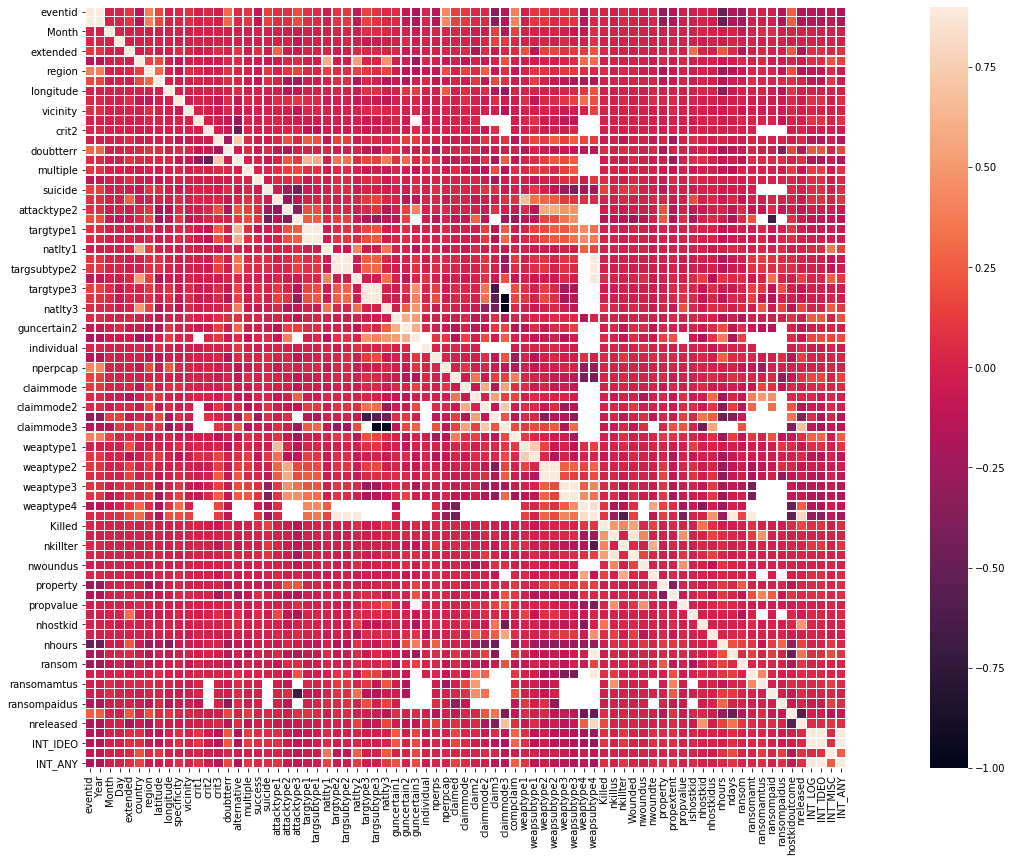

In [42]:
corr_matrix = data.corr()
plt.subplots(figsize=(30,14))
sns.heatmap(corr_matrix, lw=0.5, vmax=0.9, square=True)

In [43]:
data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [45]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [57]:
#Top 20 countries that are hot zone of terrorism(ie. they are most affected)
data['Country'].value_counts().head(20)


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

**Iraq is the country with most number of terrorist attacks. According to the dataset it has faced 24,636 terrorist attacks.** 

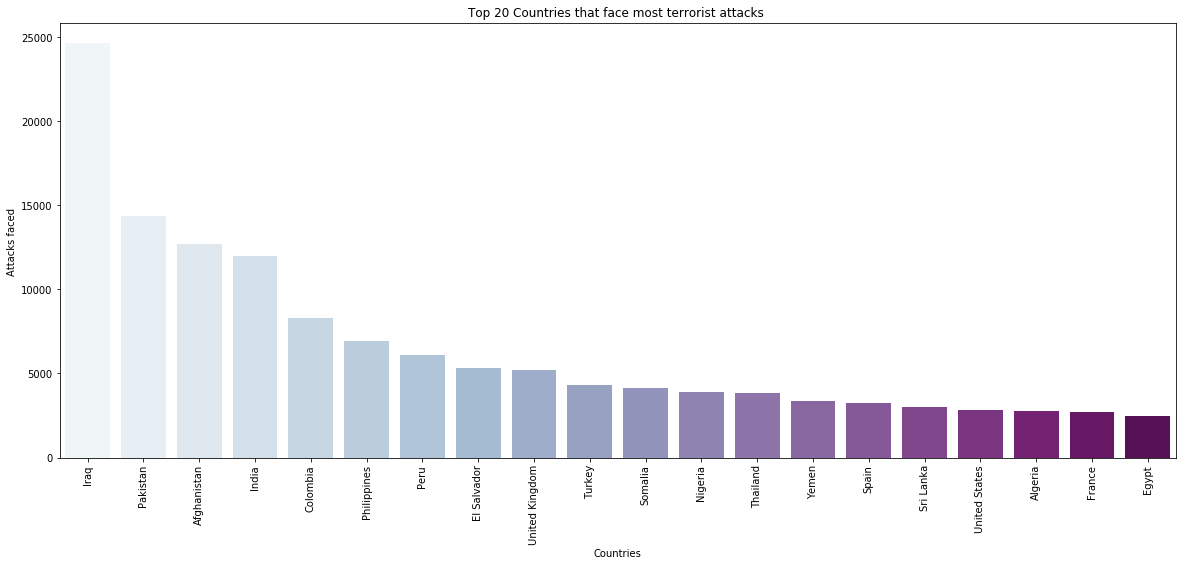

In [66]:
data['Country'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=data['Country'].value_counts()[:20].index,y=data['Country'].value_counts().values[:20], palette = 'BuPu')
plt.title('Top 20 Countries that face most terrorist attacks ')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Attacks faced ')
plt.show()


(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

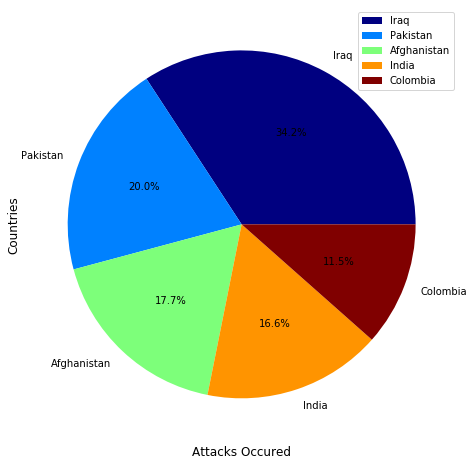

In [99]:
#Visualising the countries affected by terrorist attacks with the help of pie chart
data['Country'].value_counts().head() 
data['Country'].value_counts().head().plot(kind = 'pie',cmap='jet', figsize = (20,8), fontsize=10, autopct= '%3.1f%%', 
                                                shadow=False, startangle=0, legend=True )
plt.ylabel("Countries", size = 12)
plt.xlabel("Attacks Occured", size = 12)
plt.xticks(size = 14)
plt.yticks(size = 14)

In [79]:
#Top regions that are hot zone of terrorism(ie. they are most affected)
data['Region'].value_counts()


Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

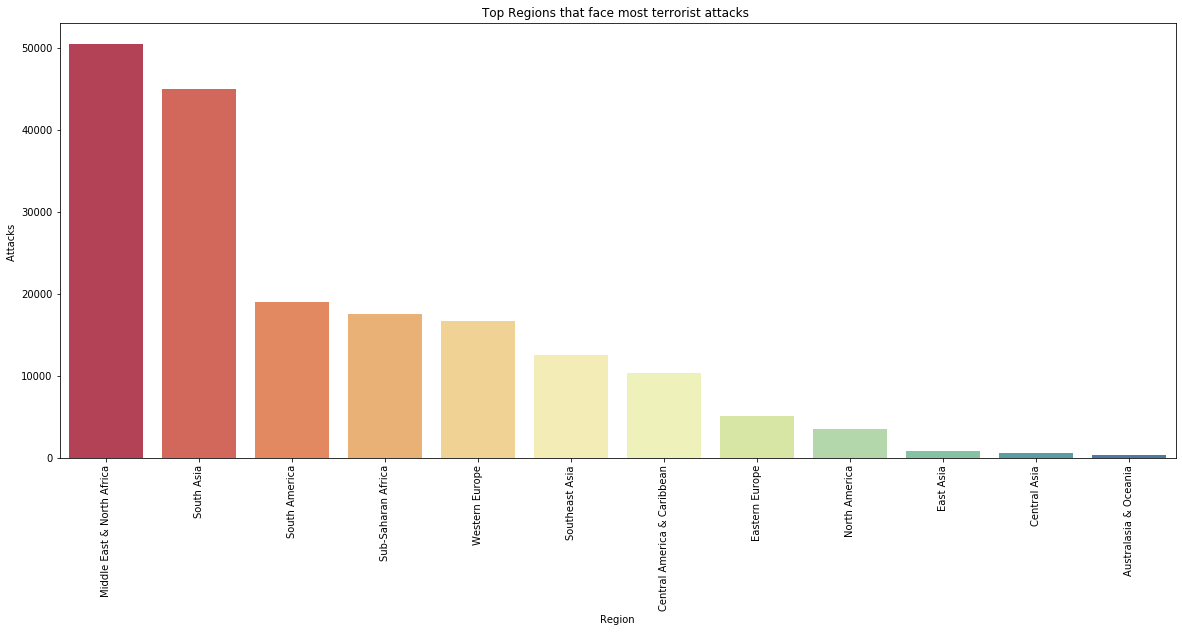

In [83]:
data['Region'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=data['Region'].value_counts()[:].index,y=data['Region'].value_counts()[:], palette = 'Spectral')
plt.title('Top Regions that face most terrorist attacks ')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Attacks ')
plt.show()


**We can clearly see that the region with most number of terrorist attacks is Middle East & North  Africa while Australasia & Oceania being the region with least number of attacks.**

In [103]:
#Top 20 states that are hot zone of terrorism(that are most prone to attacks)
data['State'].value_counts().head(20)

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

In [102]:
data['State'].value_counts().tail(20)

Su-ngai Kolok  District Su-ngai Kolok    1
Bay of Plenty                            1
White Nile                               1
Phongsaly                                1
Bizerte                                  1
Inguisha                                 1
Saint Michael                            1
Grevenmacher                             1
Central Division                         1
Guizhou                                  1
Almaty Province                          1
Pyongyang                                1
Maribor                                  1
Shandong (Province)                      1
Montenegro (Republic)                    1
Atlantico Norte (Department)             1
Centre (Department)                      1
Jalal-Abad                               1
Taichung                                 1
South Sumatra                            1
Name: State, dtype: int64

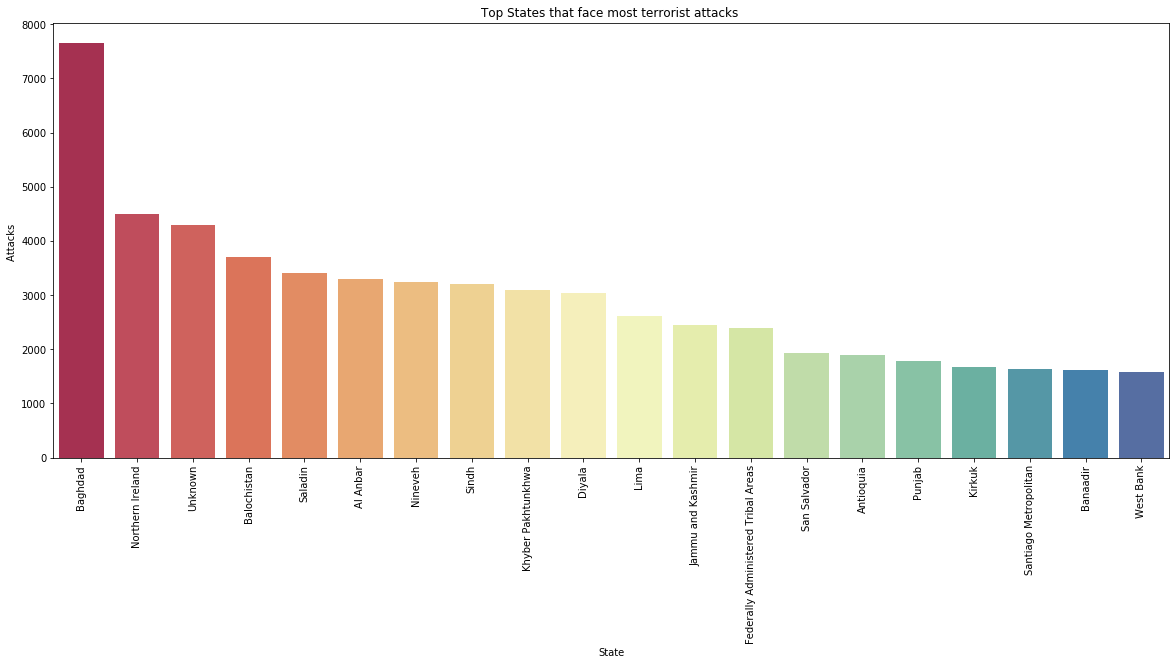

In [86]:
data['Region'].value_counts().head(20)
plt.figure(figsize=(20,8))
sns.barplot(x=data['State'].value_counts()[:20].index,y=data['State'].value_counts()[:20], palette = 'Spectral')
plt.title('Top States that face most terrorist attacks ')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Attacks ')
plt.show()

- **The state with most number of terrorist attacks is Baghdad followed by Northern Ireland.**
- **The states like Atlantico Norte (Department), Centre (Department), Jalal-Abad, Taichung, South Sumatra are less prone to terrorist attacks.**

In [107]:
data['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

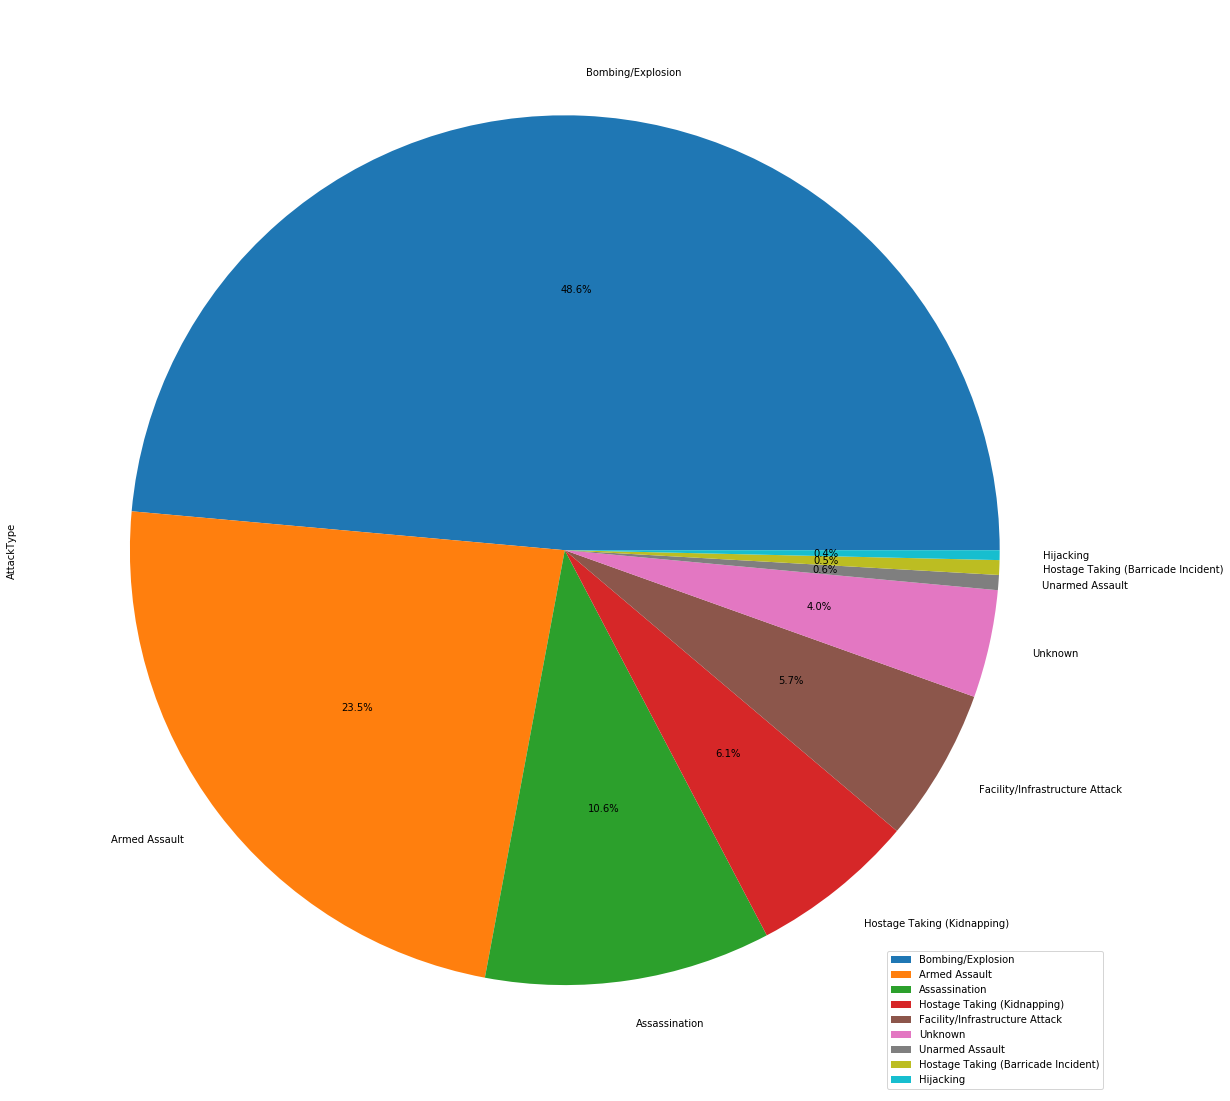

In [130]:
#Visualising the mode of attacks used in terrorist attacks with the help of pie chart

data['AttackType'].value_counts() 
data['AttackType'].value_counts().plot(kind = 'pie',cmap='tab10', figsize = (40,20), fontsize=10, autopct= '%3.1f%%', 
                                                shadow=False, startangle=0, legend=True )


**Mode of attack chosen by terrorists for attacks is bombing/explosion followed by armed assault & assassination.**

In [133]:
#Top 15 terrorist groups involved in terrorist attacks 
data['Group'].value_counts().head(15)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

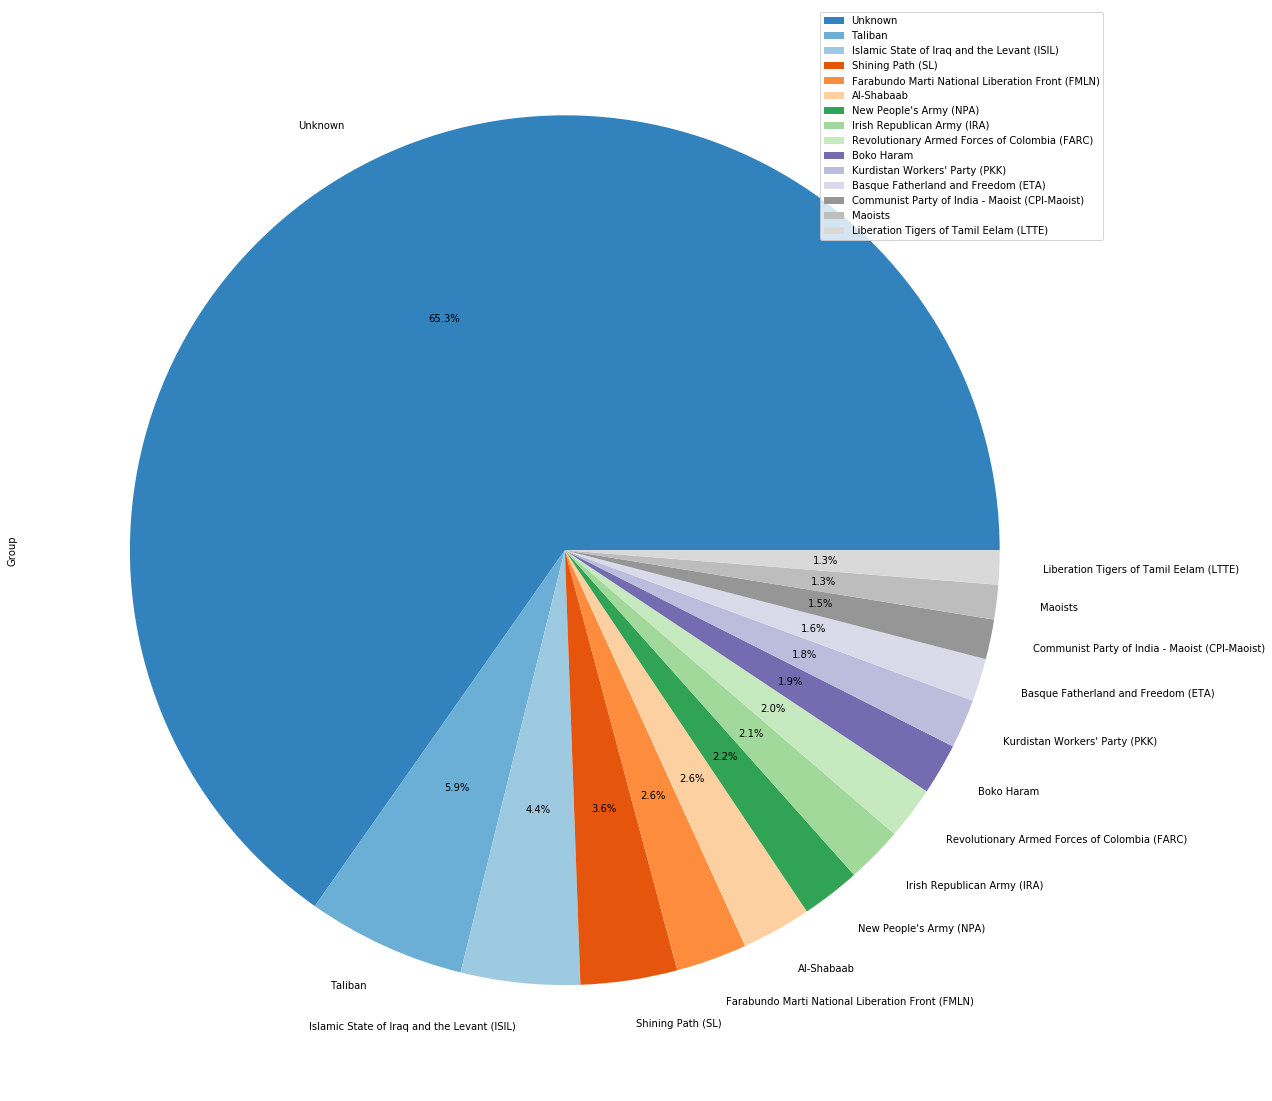

In [137]:
data['Group'].value_counts().head(15)
data['Group'].value_counts().head(15).plot(kind = 'pie',cmap='tab20c', figsize = (40,20), fontsize=10, autopct= '%3.1f%%', 
                                                shadow=False, startangle=0, legend=True )


In [139]:
data['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

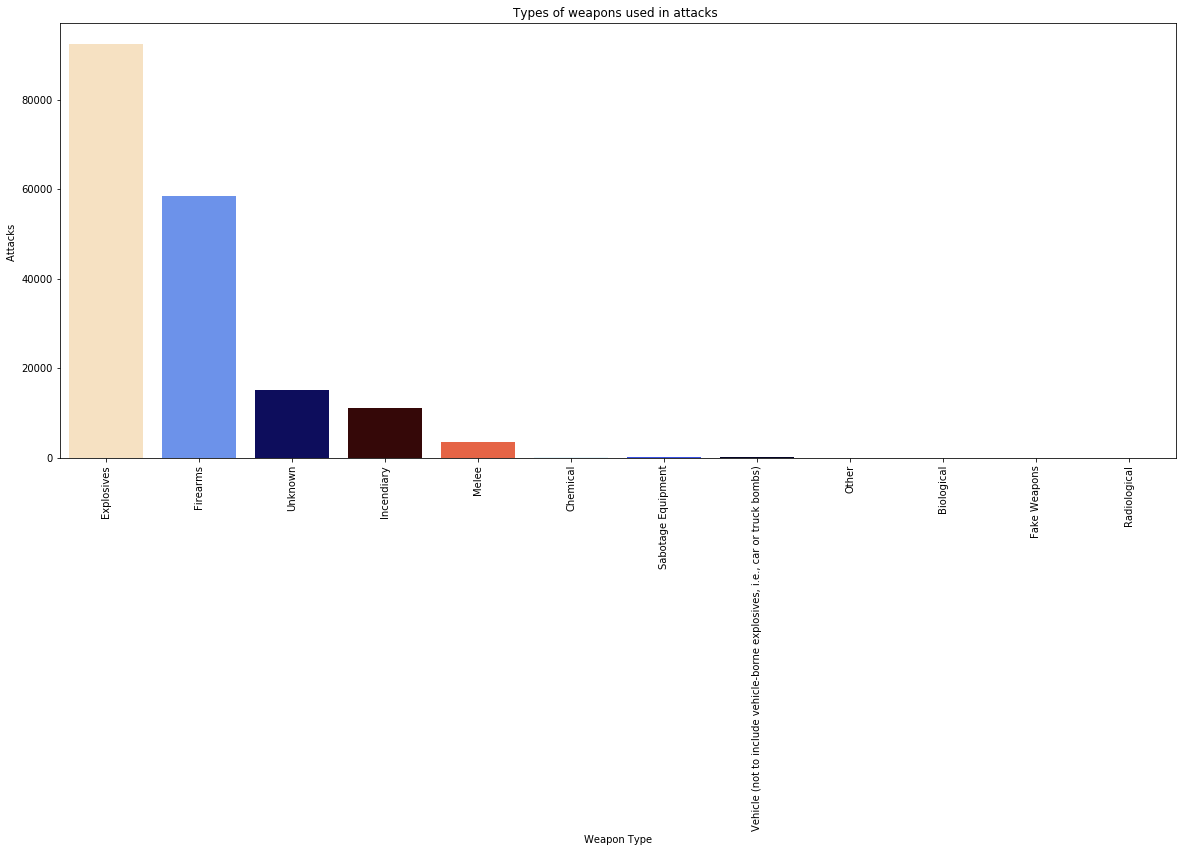

In [156]:
data['Weapon_type'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=data['Weapon_type'].value_counts()[:].index,y=data['Weapon_type'].value_counts()[:], palette = 'flag')
plt.title('Types of weapons used in attacks ')
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.ylabel('Attacks ')
plt.show()

- **Mostly widely used weapons during an attack is mostly explosives & firearms.**
- **Radiological weapons are the least used weapons during an attack.**

In [157]:
data.groupby('Year')['Wounded'].sum()

Year
1970      212.0
1971       82.0
1972      409.0
1973      495.0
1974      865.0
1975      617.0
1976      756.0
1977      518.0
1978     1600.0
1979     2506.0
1980     3645.0
1981     3337.0
1982     3342.0
1983     4047.0
1984     5291.0
1985     5130.0
1986     5814.0
1987     5775.0
1988     6960.0
1989     5539.0
1990     6128.0
1991     7591.0
1992     9915.0
1994     7569.0
1995    14292.0
1996    10795.0
1997     9072.0
1998     8183.0
1999     5341.0
2000     5869.0
2001    22774.0
2002     7162.0
2003     7384.0
2004    12022.0
2005    12784.0
2006    15550.0
2007    22524.0
2008    18998.0
2009    19138.0
2010    15947.0
2011    14659.0
2012    25445.0
2013    37688.0
2014    41128.0
2015    44043.0
2016    40001.0
2017    24927.0
Name: Wounded, dtype: float64

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text yticklabel objects>)

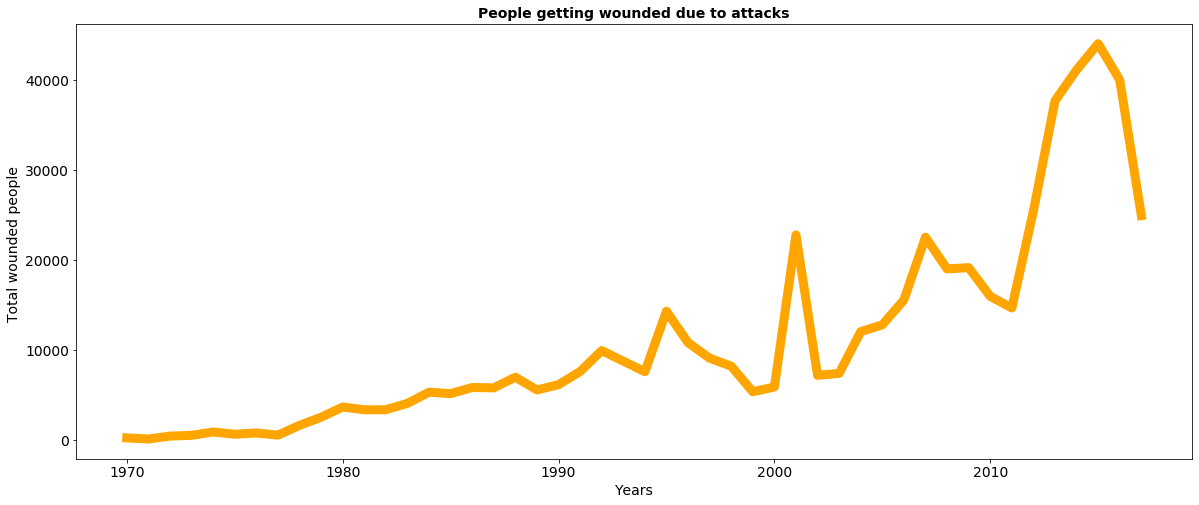

In [163]:
data.groupby('Year')['Wounded'].sum().plot(kind='line', linewidth = 9, figsize=(20,8), color = 'Orange')
plt.title("People getting wounded due to attacks",fontsize= 14, fontweight = 'bold')
plt.xlabel("Years", size = 14)
plt.ylabel("Total wounded people ", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text yticklabel objects>)

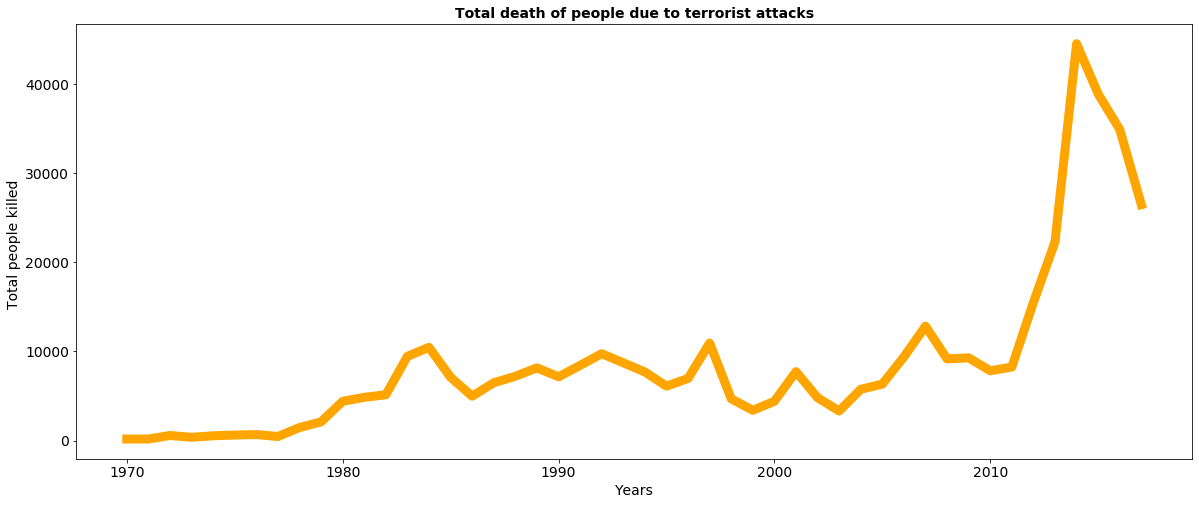

In [162]:
data.groupby('Year')['Killed'].sum().plot(kind='line', linewidth = 9, figsize=(20,8), color = 'Orange')
plt.title("Total death of people due to terrorist attacks",fontsize= 14, fontweight = 'bold')
plt.xlabel("Years", size = 14)
plt.ylabel("Total people killed ", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14)